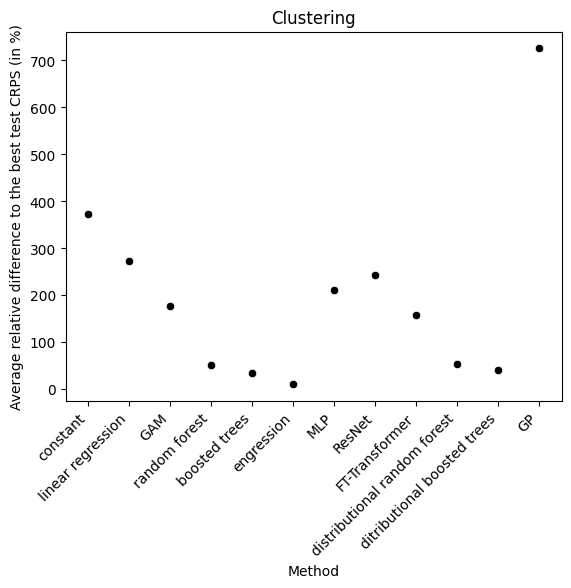

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.transforms import Bbox

directory = r'RESULTS/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = CRPS.min()
        df[task_name] = (CRPS - lowest_CRPS) / lowest_CRPS

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees', 'GP']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test CRPS (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_CRPS_only_num_features_relative_differences.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

In [12]:
df

,361072_clustering_crps_results.csv,361073_clustering_crps_results.csv,361074_clustering_crps_results.csv,361076_clustering_crps_results.csv,361077_clustering_crps_results.csv,361078_clustering_crps_results.csv,361079_clustering_crps_results.csv,361080_clustering_crps_results.csv,361081_clustering_crps_results.csv,361082_clustering_crps_results.csv,361083_clustering_crps_results.csv,361084_clustering_crps_results.csv,361085_clustering_crps_results.csv,361086_clustering_crps_results.csv,361087_clustering_crps_results.csv,361088_clustering_crps_results.csv,361279_clustering_crps_results.csv,361280_clustering_crps_results.csv,361281_clustering_crps_results.csv
Method,,,,,,,,,,,,,,,,,,,
constant,5.928328,24.468847,3.542850,0.330101,2.493636,2.170331,0.558042,4.809690,11.695375,0.884009,0.886205,2.589837,1.314625,3.662419,3.389398,0.799150,0.088875,1.051890,0.079032
MLP,5.860005,16.300454,0.951271,0.267673,0.268278,0.788203,0.355595,1.675479,5.473714,0.868449,0.572446,0.435120,1.901376,0.301862,3.538096,0.160966,0.087783,0.227717,0.078167
ResNet,4.103577,17.163013,1.576858,0.255307,1.630279,1.018724,0.522879,2.243774,6.202995,1.684835,0.757772,1.662752,0.840170,2.591256,3.214016,0.332450,0.102747,0.192751,0.072145
FTTrans,0.393448,17.972730,0.942635,0.173769,1.691361,0.872133,0.620380,1.453249,1.708892,0.858220,0.467529,0.749612,0.522039,0.402127,0.627361,0.164151,0.090479,0.157752,0.072920
distributional_boosted_trees,1.759373,3.361754,0.786900,0.100749,0.235703,0.000000,0.000000,0.000000,0.454047,0.000000,0.273440,0.000000,0.245408,0.183861,0.161318,0.000000,0.048409,0.129250,0.062787
drf,2.967157,2.139527,1.351014,0.000000,0.413705,0.178963,0.076901,0.121861,1.072845,0.115335,0.000000,0.499645,0.000000,0.364974,0.648592,0.017826,0.000000,0.116607,0.000000
boosted_trees,0.279808,3.065480,0.966214,0.123099,0.262671,0.061734,0.101873,0.026669,0.382951,0.041333,0.312998,0.117063,0.110973,0.318712,0.000000,0.066043,0.048432,0.160638,0.068593
rf,0.325309,3.940604,1.152965,0.125274,0.383989,0.175381,0.173317,0.075895,1.002223,0.092488,0.249880,0.375451,0.156446,0.516050,0.551243,0.085141,0.047016,0.170797,0.064825
linear_regression,8.573844,22.206216,1.332034,0.062877,0.198606,0.946243,1.121858,0.254054,10.091684,0.836831,0.512304,0.327151,1.165175,2.916683,0.782196,0.180428,0.094487,0.180353,0.077787


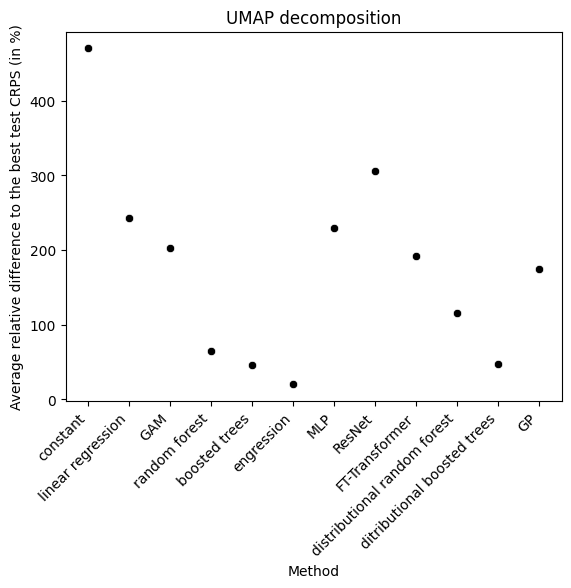

In [13]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = CRPS.min()
        df[task_name] = (CRPS - lowest_CRPS) / lowest_CRPS

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees', 'GP']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test CRPS (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_CRPS_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

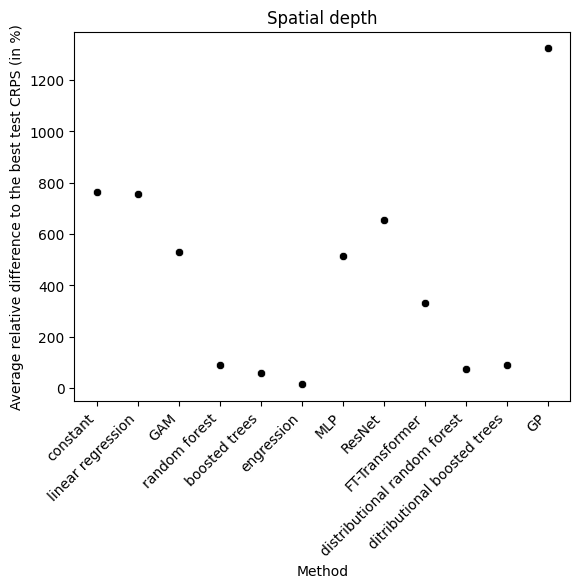

In [14]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = CRPS.min()
        df[task_name] = (CRPS - lowest_CRPS) / lowest_CRPS

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees', 'GP']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test CRPS (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_CRPS_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

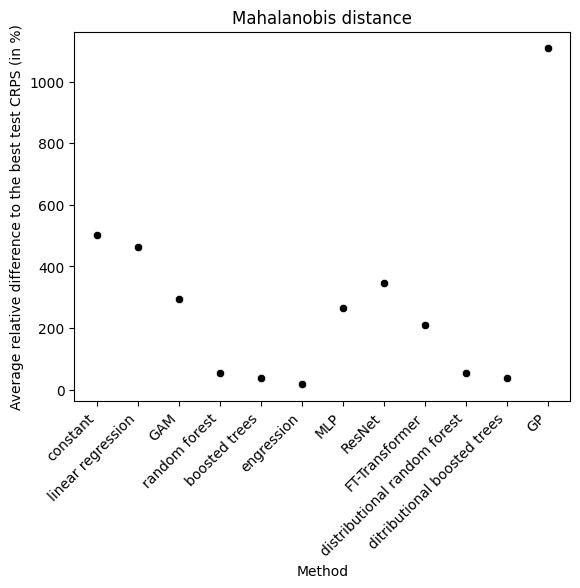

In [15]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = CRPS.min()
        df[task_name] = (CRPS - lowest_CRPS) / lowest_CRPS

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees', 'GP']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test CRPS (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_CRPS_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

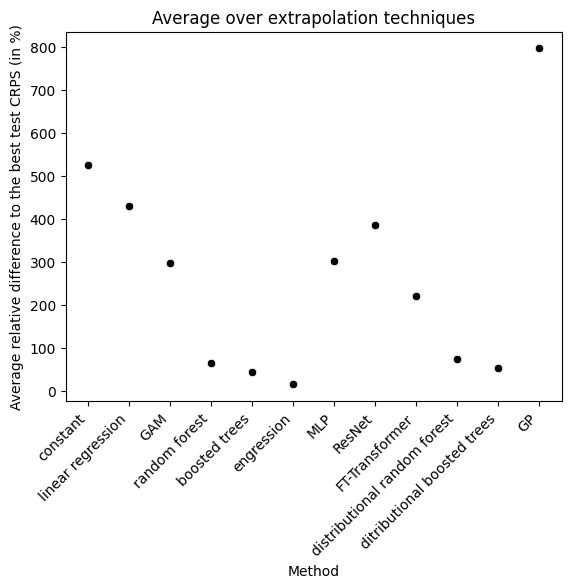

In [16]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            CRPS = table['CRPS']
            CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
            second_largest = sorted(CRPS, reverse=True)[1]
            CRPS[CRPS > 5 * second_largest] = np.nan
            lowest_CRPS = CRPS.min()
            df[task_name] = (CRPS - lowest_CRPS) / lowest_CRPS

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees', 'GP']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test CRPS (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_CRPS_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()